Documentation of Session[Click here](https://docs.google.com/document/d/16-4Y6gacxXmSx4j28W938aGOLMai2ede34vuoDMd3Bk/edit)

Documentation of CNN [Click Here](https://docs.google.com/document/d/1tXQsUti1rOXf4S4ypCBW8209YQzLK8RdDdxgeTM-7Do/edit#)

Colab Notebook of Session[Click Here](https://colab.research.google.com/drive/1G7aGTqBxwAih8O0MPwWOkiv6i6cHJGy3?usp=sharing)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2020-07-11 03:41:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  46.0MB/s    in 1.4s    

2020-07-11 03:41:38 (46.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Main Folder
--> Train - cats and dogs
--> validation-- Cats and dogs

In [ ]:
import os
import zipfile
local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered/train")

['cats', 'dogs']

In [ ]:
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/cats")))
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/dogs")))

1000
1000


In [ ]:
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
## Directory with training cat images
train_cat_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
## File names
train_cat_filenames = os.listdir(train_cat_dir )
train_cat_filenames[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

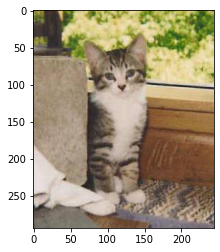

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(plt.imread(train_cat_dir+'/cat.277.jpg'))

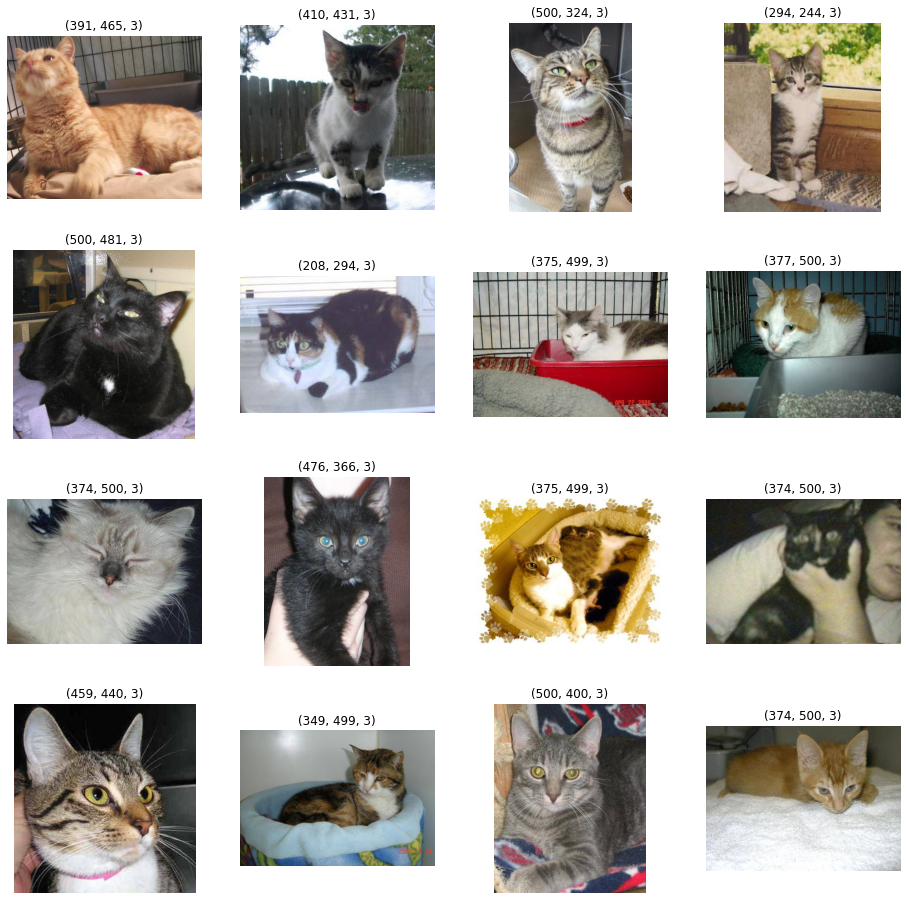

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1 ## plot position
for i in range(16):
  img=plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j+=1

Read the images data
> We have different shapes
> 

In [ ]:
#CREATING TRAIN AND VALIDATION DATA FROM FOLDER
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator

(20, 150, 150, 3)
(20,)


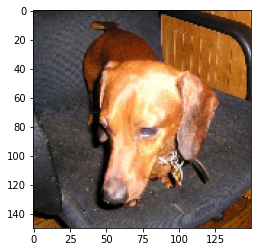

In [ ]:
imgs,labels=train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

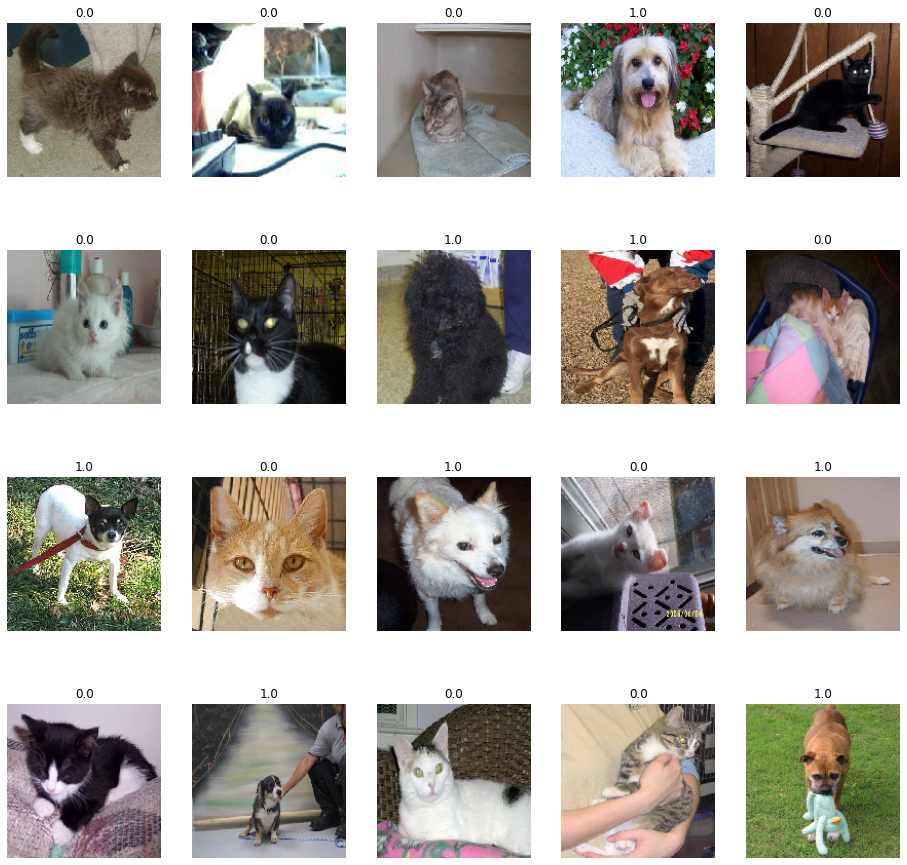

In [ ]:
plt.figure(figsize=(16,16))
pos = 1 ##plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:]) # To display the image
  plt.title(labels[i])
  plt.axis('off')
  pos +=1

In [ ]:
##import required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [ ]:
model = Sequential()
##add a conv layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))

#Convert the feature map into 1D array
model.add(Flatten())
#Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
##Final output layer
model.add(Dense(1,activation='sigmoid'))
#Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4624)             

In [ ]:
### Compiling the modle
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

##Train the model

In [ ]:
history = model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)


Epoch 1/15
100/100 [==============================] - 8s 82ms/step - loss: 0.7177 - accuracy: 0.5580 - val_loss: 0.6607 - val_accuracy: 0.6090
Epoch 2/15
100/100 [==============================] - 8s 79ms/step - loss: 0.6881 - accuracy: 0.6355 - val_loss: 0.6236 - val_accuracy: 0.6650
Epoch 3/15
100/100 [==============================] - 8s 79ms/step - loss: 0.5809 - accuracy: 0.7035 - val_loss: 0.6382 - val_accuracy: 0.6440
Epoch 4/15
100/100 [==============================] - 8s 79ms/step - loss: 0.5058 - accuracy: 0.7560 - val_loss: 1.0337 - val_accuracy: 0.5760
Epoch 5/15
100/100 [==============================] - 8s 78ms/step - loss: 0.4339 - accuracy: 0.7860 - val_loss: 0.6757 - val_accuracy: 0.6840
Epoch 6/15
100/100 [==============================] - 8s 78ms/step - loss: 0.3333 - accuracy: 0.8520 - val_loss: 0.7357 - val_accuracy: 0.6700
Epoch 7/15
100/100 [==============================] - 8s 79ms/step - loss: 0.2536 - accuracy: 0.9015 - val_loss: 0.7601 - val_accuracy: 0.6950

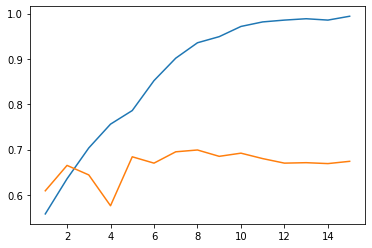

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,16))
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')


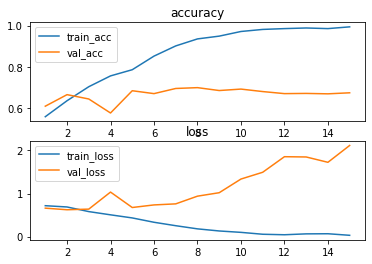

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()



In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/tmp/dog.jpg')
print(type(img))
#print(img.shape)
img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))
img=img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)


<class 'PIL.JpegImagePlugin.JpegImageFile'>
(1072, 1500, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
model.predict(img)

array([[1.]], dtype=float32)